IMPORTING THE REQUIRED PACKAGES AND MODULES

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from keras.applications.vgg16 import VGG16

IMPORTING THE DATASETS

In [ ]:
img_size=[224,244]
train_data_dir=r'/Users/rahul/Downloads/brain_tumor_dataset/train'
valid_data_dir=r'/Users/rahul/Downloads/brain_tumor_dataset/test' 

CLASSIFYING THE VGG16 MODEL 

In [4]:
vgg16=VGG16(input_shape=img_size+[3],weights='imagenet',include_top=False)

In [5]:
for layer in vgg16.layers:
    layer.trainable=False

In [6]:
folders=glob('/Users/rahul/Downloads/brain_tumor_dataset/train/*')

In [7]:
folders

['/Users/rahul/Downloads/brain_tumor_dataset/train/no',
 '/Users/rahul/Downloads/brain_tumor_dataset/train/yes']

FLATTENING THE MODEL

In [8]:
x=Flatten()(vgg16.output)

In [9]:
from tensorflow.keras.models import Model

ACTIVATION FUNCTION OF OUTPUT LAYER

In [10]:
prediction=Dense(len(folders),activation='softmax')(x)

#create a model object
model=Model(inputs=vgg16.input,outputs=prediction)

SUMMARY OF MODEL CREATED 

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 61, 128)       0     

SCALING THE INPUT IMAGES

In [12]:
train_datagen=ImageDataGenerator(rescale=1/255.0,
                                rotation_range=30,
                                zoom_range=.2,
                                horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 target_size=(224,224))
classes_name=train_generator.class_indices.keys()
classes_name=list(classes_name)
classes_name

Found 227 images belonging to 2 classes.


['no', 'yes']

In [13]:
valid_datagen=ImageDataGenerator(rescale=1/255.)
valid_generator=valid_datagen.flow_from_directory(valid_data_dir,
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  target_size=(224,224))

Found 26 images belonging to 2 classes.


COMPILATION OF MODEL

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history=model.fit(train_generator,validation_data=valid_generator,epochs=10)

Epoch 1/10
8/8 [==============================] - 28s 3s/step - loss: 1.6019 - accuracy: 0.5551 - val_loss: 0.3550 - val_accuracy: 0.8846
Epoch 2/10
8/8 [==============================] - 31s 4s/step - loss: 1.0539 - accuracy: 0.5374 - val_loss: 1.3772 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 31s 4s/step - loss: 0.8979 - accuracy: 0.7048 - val_loss: 0.6948 - val_accuracy: 0.6923
Epoch 4/10
8/8 [==============================] - 31s 4s/step - loss: 0.7083 - accuracy: 0.7225 - val_loss: 0.2532 - val_accuracy: 0.9231
Epoch 5/10
8/8 [==============================] - 32s 4s/step - loss: 0.6369 - accuracy: 0.7137 - val_loss: 0.2699 - val_accuracy: 0.8846
Epoch 6/10
8/8 [==============================] - 35s 4s/step - loss: 0.4579 - accuracy: 0.8018 - val_loss: 0.4118 - val_accuracy: 0.8077
Epoch 7/10
8/8 [==============================] - 34s 4s/step - loss: 0.3685 - accuracy: 0.8414 - val_loss: 0.2842 - val_accuracy: 0.8846
Epoch 8/10
8/8 [==================

TRAINING ACCURACY vs VALIDATION ACCURACY 

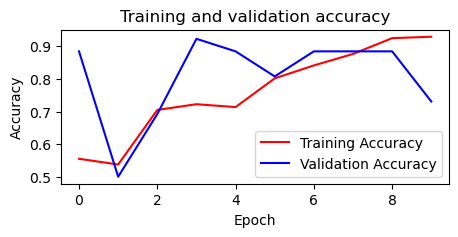

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
fig=plt.figure(figsize=(5,2))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

TRAINING LOSS vs VALIDATION LOSS 

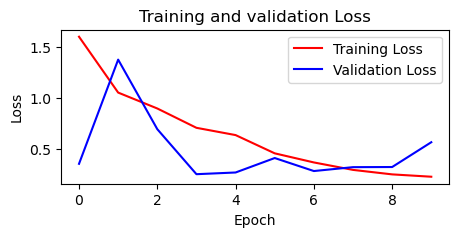

In [17]:
fig2=plt.figure(figsize=(5,2))
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend(loc='upper right')
plt.show()

SCALING THE INPUT IMAGE FROM USER USING CV2 AND PREDICTION OF THE INPUT IMAGE

(224, 244, 3)
1/1 [==============================] - 0s 121ms/step
yes


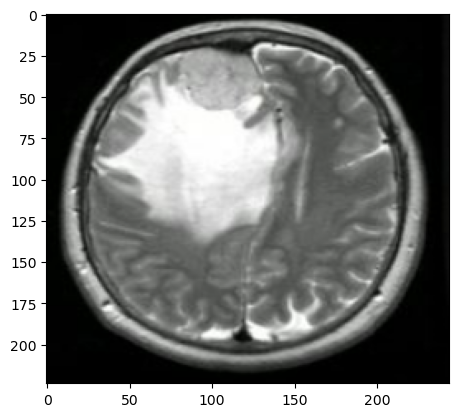

In [32]:
#predicting a single input image
import cv2
img=cv2.imread('/Users/rahul/Downloads/brain_tumor_dataset/train/yes/Y65.JPG')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(244,224))
print(img.shape)
plt.imshow(img,cmap=plt.cm.binary)

prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(classes_name[index])